# Dubai Real Estate Goldmine, UAE Rental Market Data

# Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Load the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\data analytics\data set\ml project\dubai_properties.csv")

# Understanding of Data

In [3]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
df.tail()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN
73741,"Al Rass, Umm Al Quwain",11000,0,1,Apartment,300,36.666667,Low,Yearly,Unfurnished,For Rent,2024-02-12,69,Al Rass,Umm Al Quwain,NaN,NaN


In [5]:
df.dtypes

Address                    object
Rent                        int64
Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Frequency                  object
Furnishing                 object
Purpose                    object
Posted_date                object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
dtype: object

In [6]:
df.shape

(73742, 17)

In [7]:
df.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73023.000000,73023.000000
mean,1.479250e+05,2.162811,2.650213,2054.053552,88.057754,74.261547,24.918929,55.053133
std,3.069658e+05,1.578155,1.632997,3003.919252,66.534400,72.346767,0.569356,0.653722
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,52.000000,25.078641,55.238209
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,95.000000,25.197978,55.367138
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000,25.920310,56.361294


In [11]:
df.describe(include="object")

,Address,Type,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Location,City
count,73742,73742,73742,73742,73742,73742,73742,73742,73742
unique,4515,9,3,1,2,1,544,441,8
top,"Khalifa City, Abu Dhabi",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-04-03,Al Reem Island,Dubai
freq,2300,56534,25088,73742,58062,73742,1781,3668,34250


In [12]:
df.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [13]:
df.nunique()

Address                    4515
Rent                       2099
Beds                         13
Baths                        11
Type                          9
Area_in_sqft               4964
Rent_per_sqft             31328
Rent_category                 3
Frequency                     1
Furnishing                    2
Purpose                       1
Posted_date                 544
Age_of_listing_in_days      544
Location                    441
City                          8
Latitude                    412
Longitude                   412
dtype: int64

# Data Cleaning Data Preprocessing

In [14]:
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())

In [15]:
df.isnull().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [16]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for: {col}")
    print(df[col].value_counts())
    print("***" * 10)

Value counts for: Address
Address
Khalifa City, Abu Dhabi                                                                 2300
Mohammed Bin Zayed City, Abu Dhabi                                                      1293
Madinat Al Riyadh, Abu Dhabi                                                             767
Muwaileh 3 Building, Muwailih Commercial, Sharjah                                        762
Muwaileh Building, Muwailih Commercial, Sharjah                                          713
                                                                                        ... 
Tools Building, Naif, Deira, Dubai                                                         1
Bin Shabib Mall, Al Qusais Industrial 1, Al Qusais Industrial Area, Al Qusais, Dubai       1
Bahia Residence, Liwan 2, Dubai                                                            1
The Square, Dubai Industrial City, Dubai                                                   1
Building 192, Mogul, Discovery Garde

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [18]:
numerical_columns = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft','Age_of_listing_in_days','Latitude','Longitude']

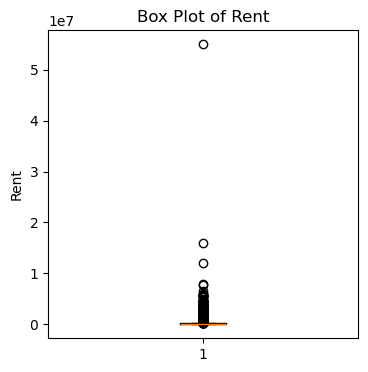

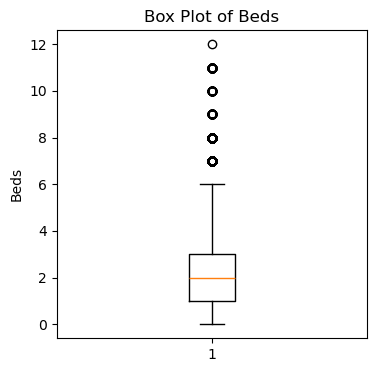

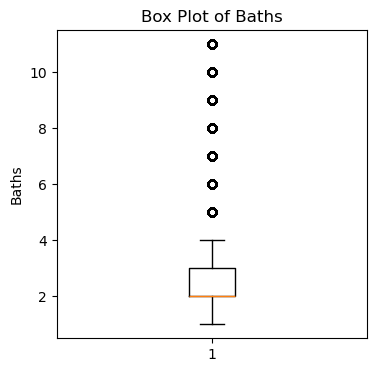

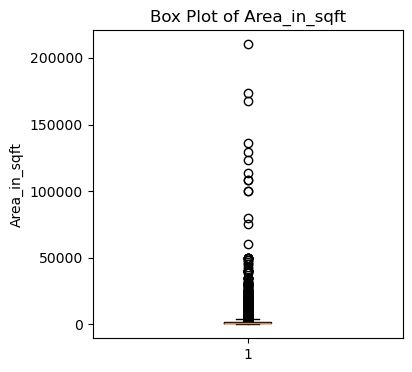

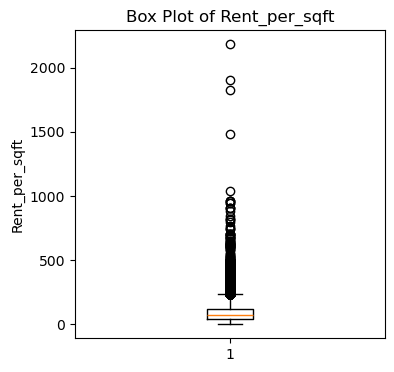

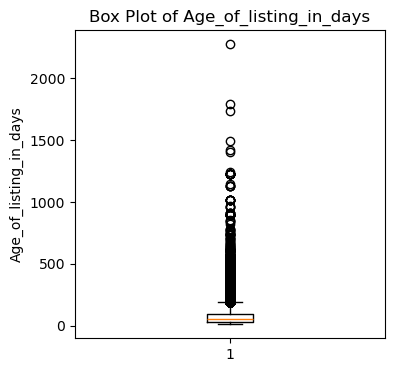

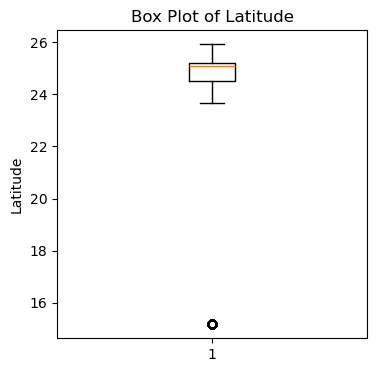

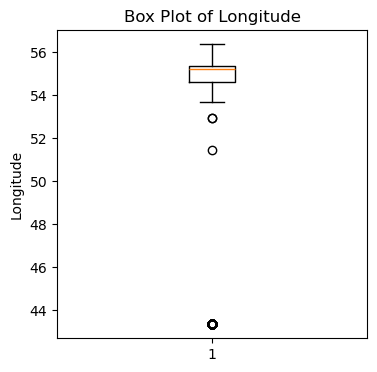

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

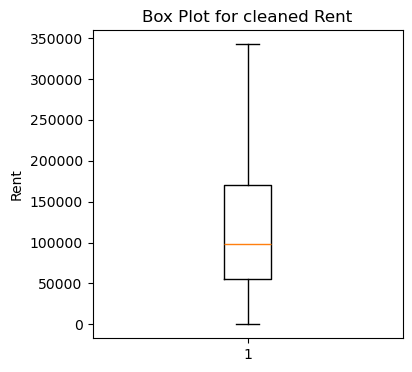

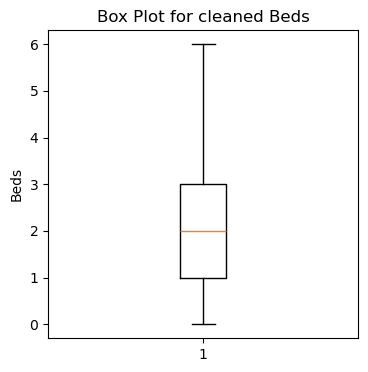

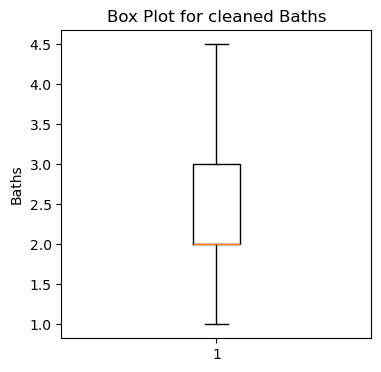

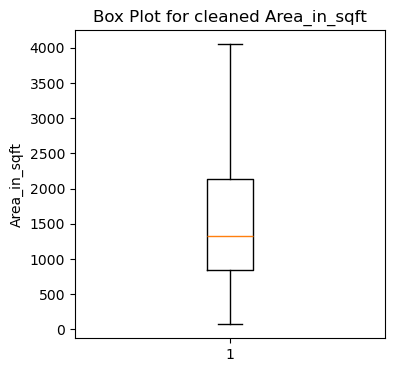

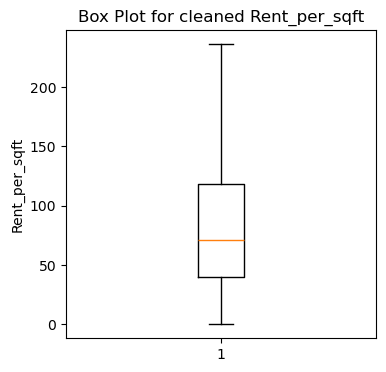

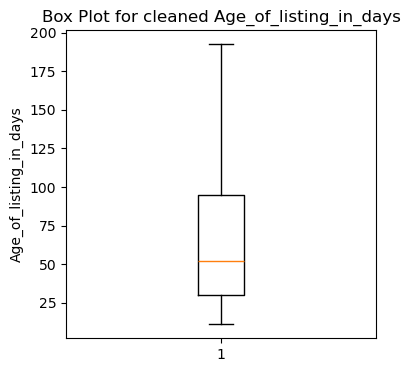

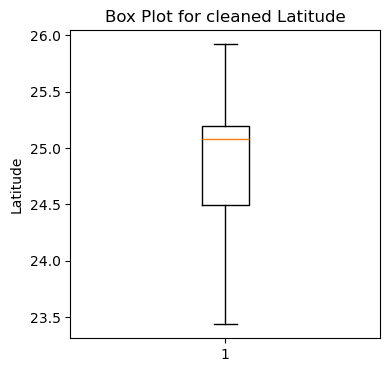

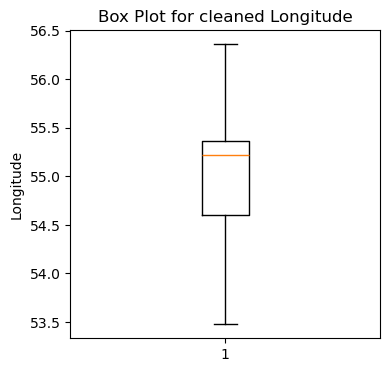

In [20]:
outliers = ['Rent','Beds','Baths','Area_in_sqft','Rent_per_sqft','Age_of_listing_in_days','Latitude','Longitude']

for col in outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # Replace values above upper with upper, below lower with lower
    df[col] = df[col].clip(lower, upper)
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for cleaned {col}')
    plt.ylabel(col)
    plt.show()

# Exploratory Data Analysis (EDA)

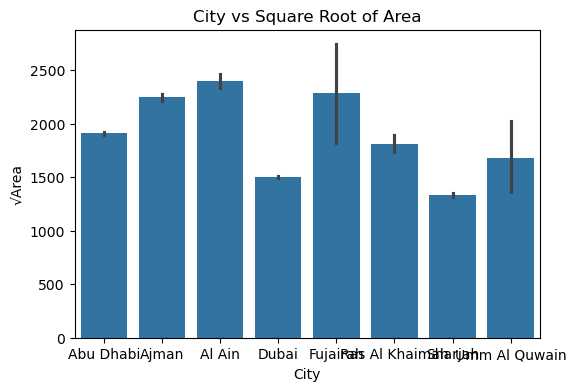

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Area_in_sqft', data=df)
plt.xlabel('City')
plt.ylabel('√Area')
plt.title('City vs Square Root of Area')
plt.show()

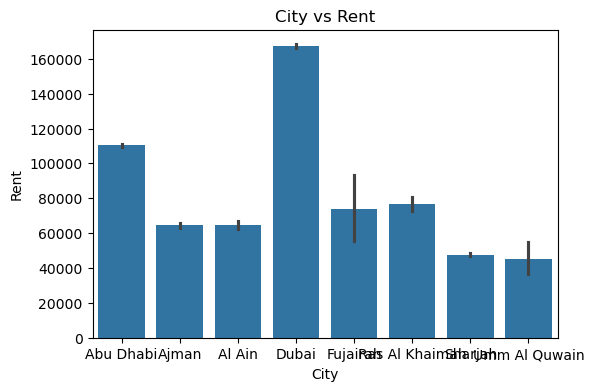

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Rent', data=df)
plt.xlabel('City')
plt.ylabel('Rent')
plt.title('City vs Rent')
plt.show()

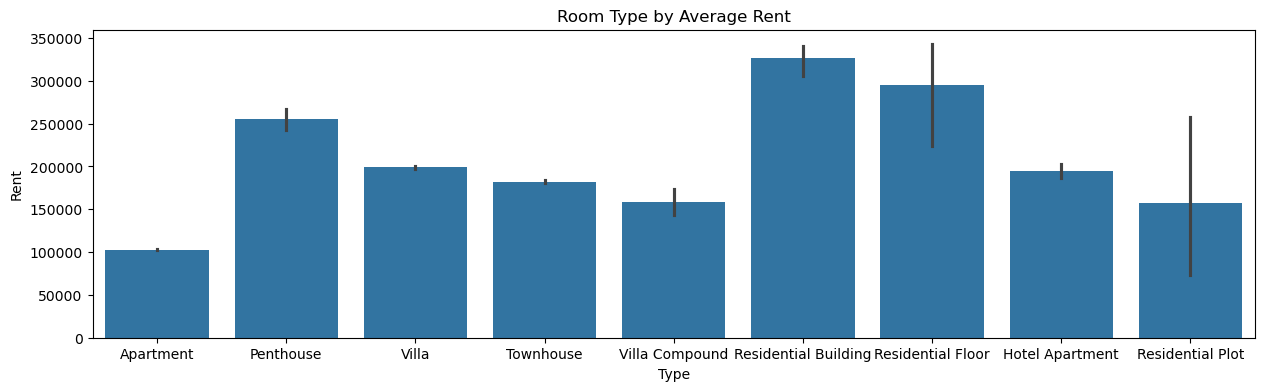

In [23]:
order = (
    df.groupby('Type')['Rent']
      .mean()
      .sort_values(ascending=True)
      .index
)
plt.figure(figsize=(15,4))
sns.barplot(x='Type', y='Rent', data=df)
plt.xlabel('Type')
plt.ylabel('Rent')
plt.title('Room Type by Average Rent')
plt.show()

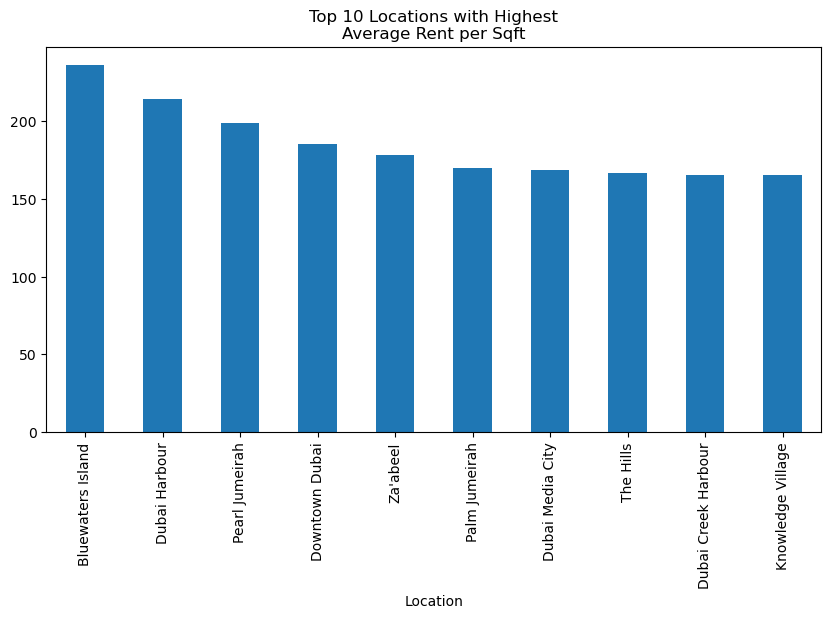

In [24]:
plt.figure(figsize=(10,5))
df.groupby('Location')['Rent_per_sqft'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Locations with Highest\nAverage Rent per Sqft")
plt.show()

# Encoding

In [25]:
a=LabelEncoder()
df['Type']=a.fit_transform(df['Type'])
df['Rent_category']=a.fit_transform(df['Rent_category'])
df['Furnishing']=a.fit_transform(df['Furnishing'])
df['Posted_date']=a.fit_transform(df['Posted_date'])
df['Location']=a.fit_transform(df['Location'])
df['City']=a.fit_transform(df['City'])
df['Type']=a.fit_transform(df['Type'])

# Correlation

In [26]:
numerical_df = df[numerical_columns]
correlation = numerical_df.corr()
correlation

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
Rent,1.000000,0.573751,0.251018,0.565744,0.514146,0.036123,0.030379,-0.030985
Beds,0.573751,1.000000,0.701600,0.904058,-0.217710,0.080683,-0.149991,-0.083362
Baths,0.251018,0.701600,1.000000,0.665988,-0.250509,0.095503,-0.306571,-0.265412
Area_in_sqft,0.565744,0.904058,0.665988,1.000000,-0.292740,0.074436,-0.169846,-0.106462
Rent_per_sqft,0.514146,-0.217710,-0.250509,-0.292740,1.000000,-0.047787,0.221600,0.103256
Age_of_listing_in_days,0.036123,0.080683,0.095503,0.074436,-0.047787,1.000000,-0.149047,-0.121674
Latitude,0.030379,-0.149991,-0.306571,-0.169846,0.221600,-0.149047,1.000000,0.807135
Longitude,-0.030985,-0.083362,-0.265412,-0.106462,0.103256,-0.121674,0.807135,1.000000


In [27]:
df=df.drop(columns=['Address','Frequency','Purpose','Posted_date'])

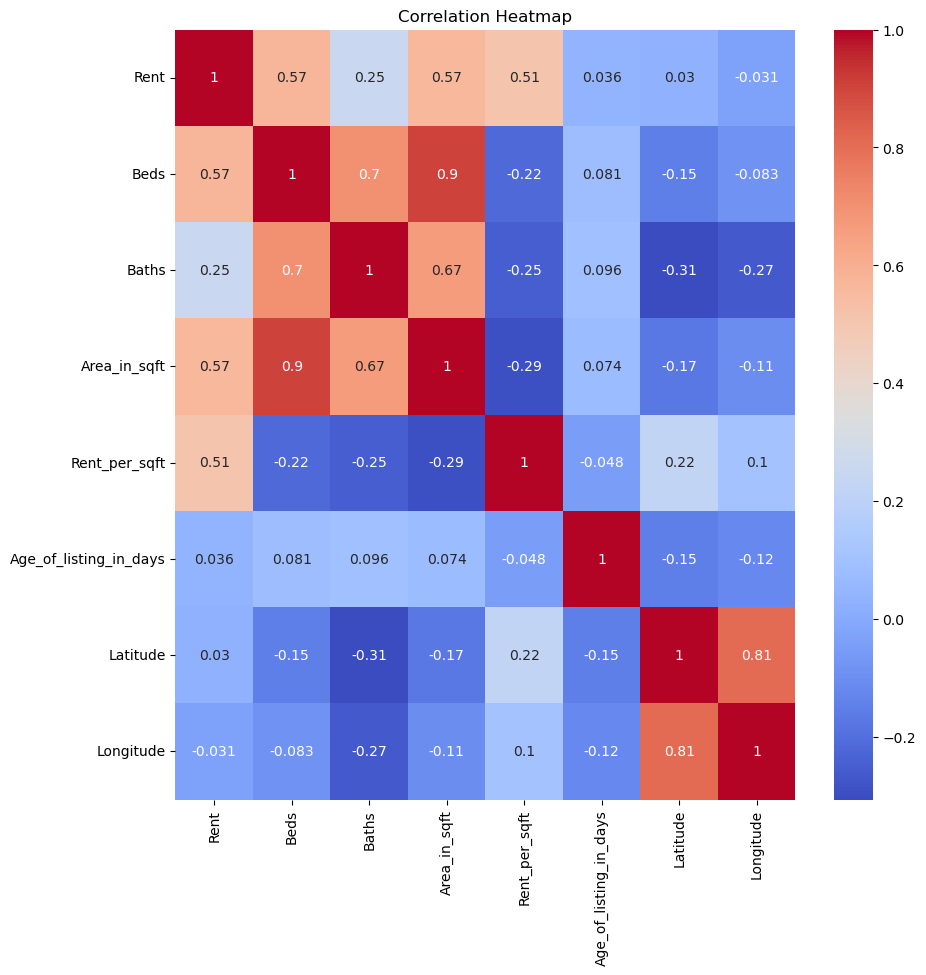

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
x=df.drop(columns=['Rent'])
y=df['Rent']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
numerical_columns = ['Beds', 'Baths', 'Area_in_sqft',
    'Rent_per_sqft', 'Age_of_listing_in_days',
    'Latitude', 'Longitude']

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_columns])
x_test_scaled  = scaler.transform(x_test[numerical_columns])

# Modeling & Evaluation

In [33]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=model.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
lr_test_r2=r2_score(y_test,y_pred)
mean
squared_error
lr_test_r2

predicted [ 80582.85171358 163693.44845884 206934.26383733 ...  22573.85340211
  22688.10269995  58600.11194062]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.8859331767580443

In [35]:
y_pred=model.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
lr_train_r2=r2_score(y_train,y_pred)
lr_train_r2

predicted [119390.89952284  92530.0858596  110231.49544842 ... 217394.87352228
  76422.98756417  63679.16804392]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.8861264653978085

In [36]:
############################
model = LinearRegression()
model.fit(x_train_scaled, y_train)        
y_pred = model.predict(x_test_scaled)     

r2 = r2_score(y_test, y_pred)             
print("R² score:", r2)


R² score: 0.8544646574558915


In [37]:
clf=DecisionTreeRegressor(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
y_pred=clf.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
dt_test_r2=r2_score(y_test,y_pred)
mean
squared_error
dt_test_r2

predicted [ 61000. 110000. 220000. ...  28000.  19000.  80000.]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9826975188098894

In [39]:
y_pred=clf.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
dt_train_r2=r2_score(y_train,y_pred)
dt_train_r2

predicted [130000. 130000. 100000. ... 225000.  63000.  82100.]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9999894745219032

In [40]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred=rfr.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
rf_test_r2=r2_score(y_test,y_pred)
mean
squared_error
rf_test_r2

predicted [ 62409.99 107649.99 218199.99 ...  27999.96  18979.91  79970.  ]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9902542502390419

In [42]:
y_pred=rfr.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
rf_train_r2=r2_score(y_train,y_pred)
rf_train_r2

predicted [130005.   130180.    99957.99 ... 224525.    62999.96  82121.94]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9985441596824188

In [43]:
gbc=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=4,random_state=42)
gbc.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [44]:
y_pred=gbc.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
gbc_test_r2=r2_score(y_test,y_pred)
mean
squared_error
gbc_test_r2

predicted [ 52020.67561816 102241.62445395 220629.89483059 ...  29305.60151699
  18722.66553583  83491.09225615]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.982323823552634

In [45]:
y_pred=gbc.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
gbc_train_r2=r2_score(y_train,y_pred)
gbc_train_r2

predicted [123644.26079697 123666.4511325   99717.07812043 ... 229903.99641466
  54557.70789196  83643.55994053]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9824855148377096

In [46]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [47]:
y_pred=knn.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
knn_test_r2=r2_score(y_test,y_pred)
mean
squared_error
knn_test_r2

predicted [ 63740.   92000.  204800.  ...  28799.8  37600.   78000. ]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9572822557874234

In [48]:
y_pred=knn.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
knn_train_r2=r2_score(y_train,y_pred)
knn_train_r2

predicted [128000.  123980.  101000.  ... 244000.   70597.8  87420. ]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.9712322045306047

In [49]:
###################
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)        
y_pred = model.predict(x_test_scaled)     

r2 = r2_score(y_test, y_pred)             
print("R² score:", r2)


R² score: 0.8544646574558915


In [50]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [51]:
y_pred=svr.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
mean=mean_absolute_error(y_test,y_pred)
squared_error=mean_squared_error(y_test,y_pred)
svr_test_r2=r2_score(y_test,y_pred)
mean
squared_error
svr_test_r2

predicted [ 65382.87305119 186102.35027073 188206.63761727 ...  19872.14116057
  14193.5690034   74089.39003221]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.8539406180574769

In [52]:
y_pred=svr.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
svr_train_r2=r2_score(y_train,y_pred)
svr_train_r2

predicted [142400.88248696 110132.58805498 130786.54090129 ... 195543.01465854
  65341.86609334  73683.31321639]
actual: [ 63000.  75000. 220000. ...  28000.  18999.  80000.]


0.855087591871275

In [53]:
##################
svr=SVR(kernel='linear')
model.fit(x_train_scaled, y_train)        
y_pred = model.predict(x_test_scaled)     

r2 = r2_score(y_test, y_pred)             
print("R² score:", r2)


R² score: 0.8544646574558915


#  Model Selection

In [54]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest","GradientBoosting","KNeighbors","SVR"],
    "Train R2": [lr_train_r2, dt_train_r2, rf_train_r2,gbc_train_r2,knn_train_r2,svr_train_r2],
    "Test R2":  [lr_test_r2, dt_test_r2, rf_test_r2,gbc_test_r2,knn_test_r2,svr_test_r2]
})
results.sort_values(by="Test R2", ascending=False)
# Detect overfitting / underfitting
results["R2 Gap"] = results["Train R2"] - results["Test R2"]
results

,Model,Train R2,Test R2,R2 Gap
0,Linear Regression,0.886126,0.885933,0.000193
1,Decision Tree,0.999989,0.982698,0.017292
2,Random Forest,0.998544,0.990254,0.008290
3,GradientBoosting,0.982486,0.982324,0.000162
4,KNeighbors,0.971232,0.957282,0.013950
5,SVR,0.855088,0.853941,0.001147


# Visualization & Insights

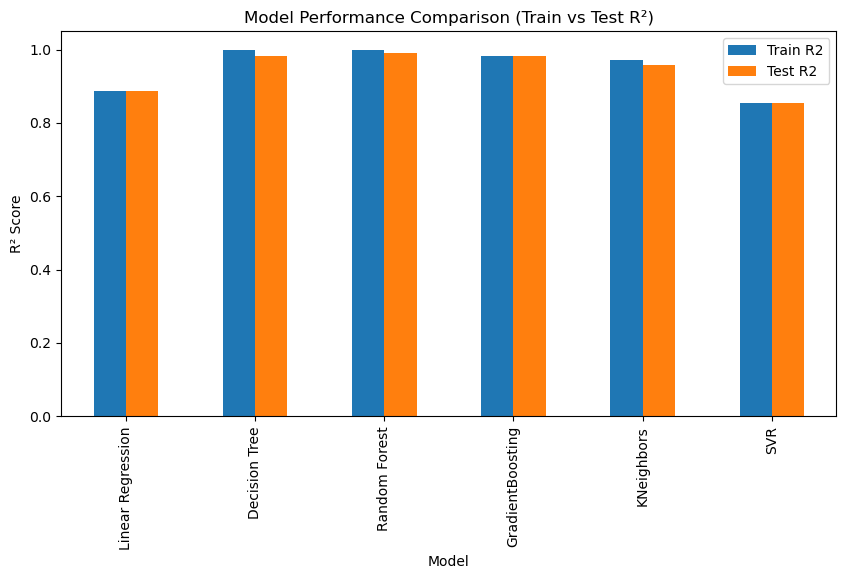

In [55]:
# 1️⃣ Model Performance Comparison (Train vs Test R²)
results.plot(
    x="Model",
    y=["Train R2", "Test R2"],
    kind="bar",
    figsize=(10,5),
    title="Model Performance Comparison (Train vs Test R²)"
)

plt.ylabel("R² Score")
plt.show()
# Insights
# Random Forest achieves the highest Test R² (0.990), indicating the best predictive performance.
# Decision Tree shows near-perfect Train R² (≈1.0), which is a sign of overfitting.
# Linear Regression performs consistently but slightly underperforms compared to ensemble models, suggesting non-linear relationships in the data.
# SVR shows the weakest performance among all models.

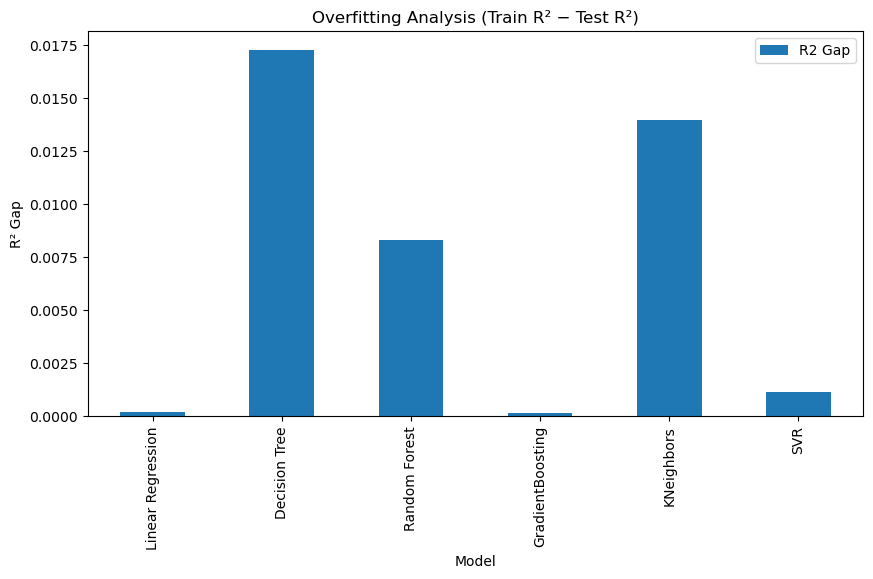

In [56]:
# 2️⃣ Overfitting Analysis (R² Gap)
results["R2 Gap"] = results["Train R2"] - results["Test R2"]
results.plot(
    x="Model",
    y="R2 Gap",
    kind="bar",
    figsize=(10,5),
    title="Overfitting Analysis (Train R² − Test R²)"
)
plt.ylabel("R² Gap")
plt.show()
# Insights
# Decision Tree has the largest R² gap, confirming strong overfitting.
# Random Forest maintains a small gap while achieving the highest Test R², showing excellent generalization.
# Gradient Boosting demonstrates balanced performance with minimal overfitting.
# Linear Regression and SVR show very small gaps but lower overall performance.

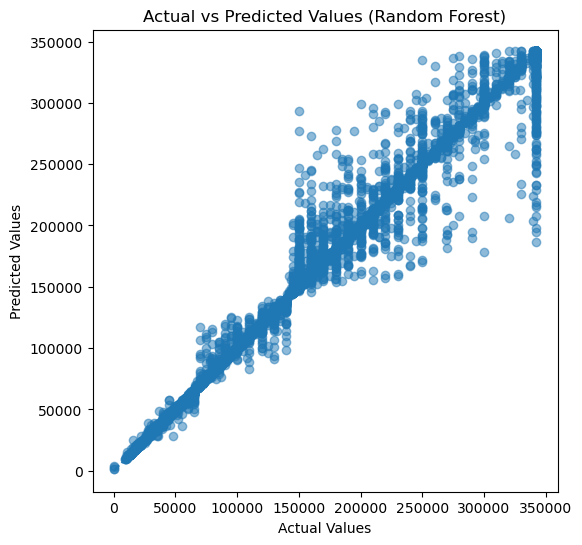

In [57]:
# 3️⃣ Actual vs Predicted Values
final_model = rfr  # Random Forest
# Predictions on test data
y_test_pred = final_model.predict(x_test)
# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()
# Insights
# The points are closely aligned along the diagonal line, indicating that predicted values closely match actual values.
# This shows that the Random Forest model captures underlying patterns effectively.
# Minor deviations from the diagonal highlight areas where prediction errors occur, which is expected in real-world data.
# The overall tight clustering confirms high prediction accuracy and strong generalization, consistent with the high Test R² score (0.99).

# Conclusion

In [58]:
import joblib
all_models = {
    "Linear Regression":model,
    "Decision Tree":clf,
    "Random Forest":rfr,
    "GradientBoosting":gbc,
    "KNeighbors":knn,
    "SVR":svr
}

# # Save to a single file
# joblib.dump(all_models, "all_models.pkl")
# print("All models saved successfully!")


In [59]:
# Final selected model: Random Forest
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [60]:
import joblib
joblib.dump(final_model, "rental_price_model.pkl")

['rental_price_model.pkl']

In [61]:
clf=DecisionTreeRegressor(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
joblib.dump(clf, "rental_price_model_git.pkl")

['rental_price_model_git.pkl']